In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
pitchfork = pd.read_csv('pitchfork.csv', header = 0)

In [3]:
pitchfork.head()

,album,artist,best_new_music,best_new_reissue,genre,label,review_date,review_text,reviewer,score,year
0,Apple,A. G. Cook,False,False,Electronic,PC Music,2020-09-24T05:00:00,PC Music founder A. G. Cook settled on Apple a...,Claire Lobenfeld,7.5,2020
1,A Day in a Yellow Beat,Yellow Days,False,False,Pop/R&B,RCA|Sony,2020-09-22T05:00:00,"Since age 17, George van den Broek has perform...",Ashley Bardhan,5.9,2020
2,BREACH,Fenne Lily,False,False,Folk/Country|Rock,Dead Oceans,2020-09-22T05:00:00,There comes a time in a disenchanted young man...,Cat Zhang,6.7,2020
3,BC,Bwoy Coyote,False,False,Pop/R&B,self-released,2020-09-22T05:00:00,Not much information is readily available on B...,Hubert Adjei-Kontoh,7.1,2020
4,Host,Cults,False,False,Rock,Sinderlyn,2020-09-22T05:00:00,The indie-pop world has completed several rota...,Arielle Gordon,6.8,2020


In [4]:
genre_score = pitchfork[['genre', 'score']].dropna().copy()

In [5]:
genre_score['genre'] = genre_score['genre'].apply(lambda s: s.split('|'))

In [6]:
gs_zip = zip(genre_score['genre'], genre_score['score'])
genre_expand = list(map(lambda t: list(zip(t[0], [t[1]]*len(t[0]))), gs_zip))
genre, score = zip(*sum(genre_expand, []))
genre_score2 = pd.DataFrame({'genre': genre, 'score':score})

In [7]:
genre_score2

,genre,score
0,Electronic,7.5
1,Pop/R&B,5.9
2,Folk/Country,6.7
3,Rock,6.7
4,Pop/R&B,7.1
...,...,...
24633,Electronic,7.5
24634,Electronic,9.4
24635,Folk/Country,7.1
24636,Rock,8.5


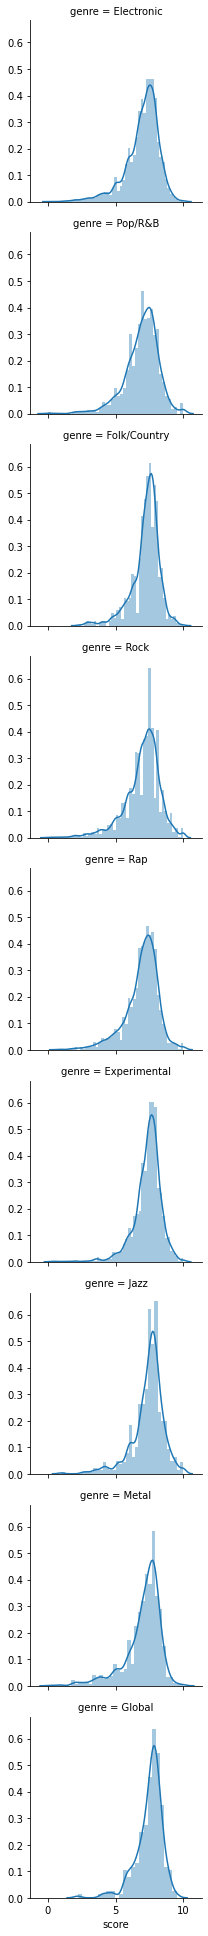

In [8]:
sns.FacetGrid(data = genre_score2, row = 'genre').map(sns.distplot, 'score')

In [9]:
unique_genres = genre_score2.genre.unique()

In [10]:
genretest = [genre_score2.loc[genre_score2['genre'] == x]['score'] for x in genre_score2.genre.unique()]

In [11]:
genretest

[0        7.5
 19       7.6
 30       7.5
 40       7.8
 44       6.6
         ... 
 24617    8.2
 24618    7.1
 24623    6.6
 24633    7.5
 24634    9.4
 Name: score, Length: 4531, dtype: float64,
 1        5.9
 4        7.1
 20       6.7
 32       7.3
 34       7.8
         ... 
 24603    7.0
 24607    5.0
 24615    8.0
 24621    6.8
 24622    8.0
 Name: score, Length: 1977, dtype: float64,
 2        6.7
 9        8.3
 14       7.5
 22       7.8
 24       7.7
         ... 
 24536    7.0
 24592    7.7
 24608    6.9
 24626    7.3
 24635    7.1
 Name: score, Length: 925, dtype: float64,
 3        6.7
 5        6.8
 6        8.0
 8        6.9
 11       7.3
         ... 
 24629    7.9
 24630    6.4
 24632    8.4
 24636    8.5
 24637    8.3
 Name: score, Length: 10756, dtype: float64,
 7        7.2
 10       6.0
 23       6.3
 36       5.5
 38       6.8
         ... 
 24379    8.2
 24390    8.3
 24426    6.1
 24605    7.3
 24627    8.7
 Name: score, Length: 2295, dtype: float64,
 12       

In [12]:
from scipy import stats

In [13]:
stats.f_oneway(*genretest) #there is a significant difference between data in 

F_onewayResult(statistic=40.835200155256565, pvalue=2.4016695096996154e-65)

In [14]:
chisqtest = pitchfork[['genre']].copy()
chisqtest

,genre
0,Electronic
1,Pop/R&B
2,Folk/Country|Rock
3,Pop/R&B
4,Rock
...,...
22891,Electronic
22892,NaN
22893,Folk/Country
22894,Rock


In [192]:
chisqtest.genre.unique()

array(['Electronic', 'Pop/R&B', 'Folk/Country|Rock', 'Rock', 'Rap',
       'Folk/Country', 'Experimental', 'Jazz',
       'Experimental|Folk/Country', 'Pop/R&B|Rock', 'Rock|Experimental',
       'Metal', 'Metal|Rock', nan, 'Electronic|Rock',
       'Folk/Country|Experimental', 'Rap|Rock', 'Electronic|Pop/R&B',
       'Jazz|Pop/R&B', 'Pop/R&B|Rap', 'Experimental|Pop/R&B',
       'Experimental|Electronic', 'Rap|Pop/R&B', 'Rock|Rap',
       'Electronic|Experimental', 'Pop/R&B|Electronic',
       'Experimental|Rock', 'Electronic|Experimental|Folk/Country',
       'Electronic|Global', 'Experimental|Metal',
       'Jazz|Experimental|Rock', 'Metal|Rap', 'Electronic|Jazz|Rock',
       'Rock|Electronic', 'Global', 'Global|Pop/R&B', 'Experimental|Jazz',
       'Rock|Folk/Country', 'Global|Rap', 'Rock|Pop/R&B',
       'Electronic|Experimental|Rock', 'Pop/R&B|Experimental',
       'Electronic|Experimental|Metal', 'Folk/Country|Pop/R&B',
       'Global|Rock', 'Global|Jazz', 'Folk/Country|Electronic

In [15]:
chisqcols = [chisqtest['genre'].dropna().apply(lambda t: s in str(t)) for s in unique_genres]

In [16]:
dfdf = pd.DataFrame(np.matrix(chisqcols).T, columns = unique_genres)
dfdf

,Electronic,Pop/R&B,Folk/Country,Rock,Rap,Experimental,Jazz,Metal,Global
0,True,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False
2,False,False,True,True,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
20555,True,False,False,False,False,False,False,False,False
20556,True,False,False,False,False,False,False,False,False
20557,False,False,True,False,False,False,False,False,False
20558,False,False,False,True,False,False,False,False,False


In [17]:
dfdfcounts = dfdf.groupby(unique_genres.tolist()).apply(lambda g: g.shape[0])
dfdfcounts

Electronic  Pop/R&B  Folk/Country  Rock   Rap    Experimental  Jazz   Metal  Global
False       False    False         False  False  False         False  False  True      132
                                                                      True   False     485
                                                               True   False  False     271
                                                                             True        9
                                                                      True   False      19
                                                                                      ... 
True        True     False         False  True   False         True   False  False       1
                                   True   False  False         False  False  False       8
                                                                             True        1
                                                 True          False  False  False       1
      

In [18]:
genre_dep = dfdf.groupby(unique_genres.tolist()).apply(lambda g: g.shape[0]).index
genre_dep

MultiIndex([(False, False, False, False, False, False, False, False,  True),
            (False, False, False, False, False, False, False,  True, False),
            (False, False, False, False, False, False,  True, False, False),
            (False, False, False, False, False, False,  True, False,  True),
            (False, False, False, False, False, False,  True,  True, False),
            (False, False, False, False, False,  True, False, False, False),
            (False, False, False, False, False,  True, False, False,  True),
            (False, False, False, False, False,  True, False,  True, False),
            (False, False, False, False, False,  True,  True, False, False),
            (False, False, False, False,  True, False, False, False, False),
            (False, False, False, False,  True, False, False, False,  True),
            (False, False, False, False,  True, False, False,  True, False),
            (False, False, False, False,  True, False,  True, False, False),

In [19]:
def genre_mix(t):
    try:
        x = dfdfcounts[t]
    except:
        x = 0
    return x

In [20]:
genre_mix((False, False, False, False, False, False, False, False, True))

132

In [21]:
import itertools
L=[False,True]
L2 = list(itertools.product(L,repeat=9))
np.array(list(map(genre_mix, L2))).reshape(2,2,2,2,2,2,2,2,2)

array([[[[[[[[[   0,  132],
              [ 485,    0]],

             [[ 271,    9],
              [  19,    0]]],


            [[[1076,    7],
              [  23,    0]],

             [[  67,    0],
              [   0,    0]]]],



           [[[[1998,    2],
              [  16,    0]],

             [[  10,    1],
              [   0,    0]]],


            [[[  17,    0],
              [   0,    0]],

             [[   0,    0],
              [   0,    0]]]]],




          [[[[[8021,   11],
              [ 332,    0]],

             [[  20,    0],
              [   6,    0]]],


            [[[ 814,    1],
              [  34,    0]],

             [[  11,    0],
              [   0,    0]]]],



           [[[[  57,    0],
              [   1,    0]],

             [[   0,    0],
              [   0,    0]]],


            [[[   4,    0],
              [   0,    0]],

             [[   0,    0],
              [   0,    0]]]]]],





         [[[[[[ 755,    0],
              

### this chi2 test shows that the genres are NOT independent of each other. not proper to use anova to assess difference in score between genres.

In [22]:
stats.chi2_contingency(np.array(list(map(genre_mix, L2))).reshape(*[2]*9))

(18685.06468836919,
 0.0,
 502,
 array([[[[[[[[[4.74783101e+03, 5.91520778e+01],
               [2.36106780e+02, 2.94159725e+00]],
 
              [[1.41985429e+02, 1.76896210e+00],
               [7.06084997e+00, 8.79694215e-02]]],
 
 
             [[[6.06826453e+02, 7.56030397e+00],
               [3.01771146e+01, 3.75969369e-01]],
 
              [[1.81473422e+01, 2.26093346e-01],
               [9.02456414e-01, 1.12434861e-02]]]],
 
 
 
            [[[[5.96565681e+02, 7.43246749e+00],
               [2.96668525e+01, 3.69612138e-01]],
 
              [[1.78404905e+01, 2.22270355e-01],
               [8.87196861e-01, 1.10533711e-02]]],
 
 
             [[[7.62478352e+01, 9.49953332e-01],
               [3.79175899e+00, 4.72406079e-02]],
 
              [[2.28021628e+00, 2.84086630e-02],
               [1.13393784e-01, 1.41274572e-03]]]]],
 
 
 
 
           [[[[[5.20886070e+03, 6.48959353e+01],
               [2.59033510e+02, 3.22723583e+00]],
 
              [[1.55772671e+02, 1.9407

In [427]:
[[dfdf[(dfdf['Rock'] == x) & (dfdf['Electronic'] == y)].shape[0] for x in [True, False]] for y in [True, False]]

[[1268, 3263], [9488, 6541]]

In [428]:
stats.chi2_contingency([[dfdf[(dfdf['Rock'] == x) & (dfdf['Electronic'] == y)].shape[0] for x in [True, False]] for y in [True, False]])

(1377.8424790161157,
 1.3719328753629211e-301,
 1,
 array([[2370.40058366, 2160.59941634],
        [8385.59941634, 7643.40058366]]))

### GENDER PRONOUN ANALYSIS:

In [23]:
masc_pron = " he[\s\.,':]| him[\s\.,':]| his[\s\.,':]|He[\s\.,':]|Him[\s\.,':]|His[\s\.,':]"
fem_pron = " she[\s\.,':]| her[\s\.,':]| hers[\s\.,':]|She[\s\.,':]|Her[\s\.,':]|Hers[\s\.,':]"

In [196]:
import re
pitchfork['review_text'].apply(lambda text: (len(re.findall(masc_pron, text)), len(re.findall(fem_pron, text))))
#not all reviews are str type? are some missing?

TypeError: expected string or bytes-like object

In [197]:
set([type(review) for review in pitchfork['review_text']])

{float, str}

In [198]:
pitchfork['review_text'].isna().sum()

4

In [199]:
pitchfork.loc[pitchfork['review_text'].apply(lambda review: isinstance(review, float))]
#yes -- four reviews missing. all madonna, all from the same day, part of a special madonna birthday series or something
#need to rescrape to get review text here #just remove for now

,album,artist,best_new_music,best_new_reissue,genre,label,review_date,review_text,reviewer,score,year
4225,Ray of Light,Madonna,False,False,Pop/R&B,Warner Bros.,2017-08-16T05:00:00,NaN,Alex Frank,8.1,1998
4226,Bedtime Stories,Madonna,False,False,Pop/R&B,Warner Bros.|Maverick,2017-08-16T05:00:00,NaN,Owen Pallett,6.5,1994
4227,Like a Prayer,Madonna,False,False,Pop/R&B,Sire,2017-08-16T05:00:00,NaN,Maura Johnston,9.0,1989
4228,Madonna,Madonna,False,False,Pop/R&B,Warner Bros.,2017-08-16T05:00:00,NaN,Jillian Mapes,8.2,1983


In [26]:
import re

In [24]:
pronoun_df = pitchfork[['score', 'review_text', 'review_date']].copy()

In [27]:
pronouns = pronoun_df['review_text'].dropna().copy().apply(lambda text: (len(re.findall(masc_pron, text)), len(re.findall(fem_pron, text))))
pronouns

0         (5, 0)
1        (10, 1)
2         (4, 3)
3        (30, 0)
4         (0, 5)
          ...   
22891    (13, 0)
22892    (20, 0)
22893    (0, 21)
22894     (1, 5)
22895    (10, 0)
Name: review_text, Length: 22892, dtype: object

In [205]:
pronoun_df = pronoun_df[~pronoun_df.review_text.isnull()][['score', 'review_date']].copy()
pronoun_df['masc_pronouns'] = [t[0] for t in pronouns]
pronoun_df['fem_pronouns'] = [t[1] for t in pronouns]
pronoun_df['review_year'] = pd.to_datetime(pronoun_df['review_date']).apply(lambda d: d.year)
pronoun_df

AttributeError: 'DataFrame' object has no attribute 'review_text'

In [29]:
print(pronoun_df[['fem_pronouns', 'masc_pronouns']].corr().iloc[0,1])
print(pronoun_df[['score', 'masc_pronouns']].corr().iloc[0,1])
print(pronoun_df[['score', 'fem_pronouns']].corr().iloc[0,1])

-0.17047111186943964
0.0924638144005593
0.09181854605540116


In [30]:
print('correlation between number of masc pronouns and score by year')
print('-'*50)
print(pronoun_df.groupby('review_year').apply(lambda df: df[['score', 'masc_pronouns']].corr().iloc[0,1]), '\n')
print('correlation between number of fem pronouns and score by year')
print('-'*50)
print(pronoun_df.groupby('review_year').apply(lambda df: df[['score', 'fem_pronouns']].corr().iloc[0,1]),)

correlation between number of masc pronouns and score by year
--------------------------------------------------
review_year
1999    0.018788
2000    0.043749
2001    0.074310
2002    0.095846
2003    0.029969
2004    0.040075
2005    0.081305
2006    0.108915
2007    0.035831
2008    0.083932
2009    0.034500
2010    0.149755
2011    0.108361
2012    0.070406
2013    0.086250
2014    0.060155
2015    0.034805
2016    0.171310
2017    0.076344
2018    0.075540
2019    0.069304
2020    0.129959
dtype: float64 

correlation between number of fem pronouns and score by year
--------------------------------------------------
review_year
1999    0.005120
2000   -0.025045
2001   -0.018706
2002    0.017371
2003    0.000750
2004    0.034248
2005    0.047880
2006    0.040534
2007    0.016335
2008    0.054491
2009   -0.006646
2010    0.048181
2011    0.005975
2012    0.043882
2013    0.118997
2014    0.079702
2015    0.122629
2016    0.167837
2017    0.159529
2018    0.151066
2019    0.175429
202

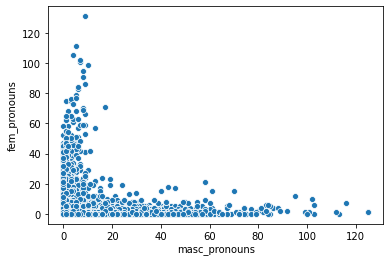

In [31]:
sns.scatterplot(data = pronoun_df, x = 'masc_pronouns', y = 'fem_pronouns')

In [32]:
print('fem pronoun ratio per year')
print('-'*50)
print(pronoun_df.groupby('review_year').apply(lambda df: df['fem_pronouns'].sum() / (df['masc_pronouns'].sum()+df['fem_pronouns'].sum())), '\n')
print('masc pronoun ratio per year')
print('-'*50)
print(pronoun_df.groupby('review_year').apply(lambda df: df['masc_pronouns'].sum() / (df['masc_pronouns'].sum()+df['fem_pronouns'].sum())))

fem pronoun ratio per year
--------------------------------------------------
review_year
1999    0.231884
2000    0.200902
2001    0.167720
2002    0.145460
2003    0.155140
2004    0.191972
2005    0.178739
2006    0.202533
2007    0.213877
2008    0.221940
2009    0.196301
2010    0.189372
2011    0.182555
2012    0.227658
2013    0.205272
2014    0.215671
2015    0.273666
2016    0.258470
2017    0.278357
2018    0.280167
2019    0.384107
2020    0.344281
dtype: float64 

masc pronoun ratio per year
--------------------------------------------------
review_year
1999    0.768116
2000    0.799098
2001    0.832280
2002    0.854540
2003    0.844860
2004    0.808028
2005    0.821261
2006    0.797467
2007    0.786123
2008    0.778060
2009    0.803699
2010    0.810628
2011    0.817445
2012    0.772342
2013    0.794728
2014    0.784329
2015    0.726334
2016    0.741530
2017    0.721643
2018    0.719833
2019    0.615893
2020    0.655719
dtype: float64


### GENRE ANALYSIS BY YEAR

In [33]:
genre_copy = pitchfork[['genre', 'score', 'review_date']].copy()
genre_copy['review_year'] = pd.to_datetime(pitchfork['review_date']).apply(lambda d: d.year)
genre_copy = genre_copy[['genre', 'score', 'review_year']].dropna()
genre_copy

,genre,score,review_year
0,Electronic,7.5,2020
1,Pop/R&B,5.9,2020
2,Folk/Country|Rock,6.7,2020
3,Pop/R&B,7.1,2020
4,Rock,6.8,2020
...,...,...,...
22890,Electronic,7.5,2001
22891,Electronic,9.4,2001
22893,Folk/Country,7.1,2001
22894,Rock,8.5,2001


In [34]:
genres = genre_copy['genre'].map(lambda s: s.split('|'))
genres_split = []
for index in genres.index:
    genres_split.extend([[index, genre] for genre in genres[index]])
to_join = pd.DataFrame(genres_split, columns = ['index', 'genre'])
genre_copy = pd.merge(genre_copy.drop('genre', axis = 1), to_join, left_index=True, right_on='index')
genre_copy

,score,review_year,index,genre
0,7.5,2020,0,Electronic
1,5.9,2020,1,Pop/R&B
2,6.7,2020,2,Folk/Country
3,6.7,2020,2,Rock
4,7.1,2020,3,Pop/R&B
...,...,...,...,...
24633,7.5,2001,22890,Electronic
24634,9.4,2001,22891,Electronic
24635,7.1,2001,22893,Folk/Country
24636,8.5,2001,22894,Rock


In [35]:
genre_scores_by_year = genre_copy.groupby(['review_year', 'genre']).score.mean()

In [36]:
df = pd.DataFrame({'year': [index[0] for index in genre_scores_by_year.index],
                   'genre': [index[1] for index in genre_scores_by_year.index],
                   'mean_score': [genre_scores_by_year[index] for index in genre_scores_by_year.index]})
df

,year,genre,mean_score
0,1999,Electronic,6.789706
1,1999,Experimental,6.539130
2,1999,Folk/Country,7.585714
3,1999,Global,9.000000
4,1999,Jazz,7.466667
...,...,...,...
193,2020,Jazz,7.800000
194,2020,Metal,7.285714
195,2020,Pop/R&B,7.025197
196,2020,Rap,7.157042


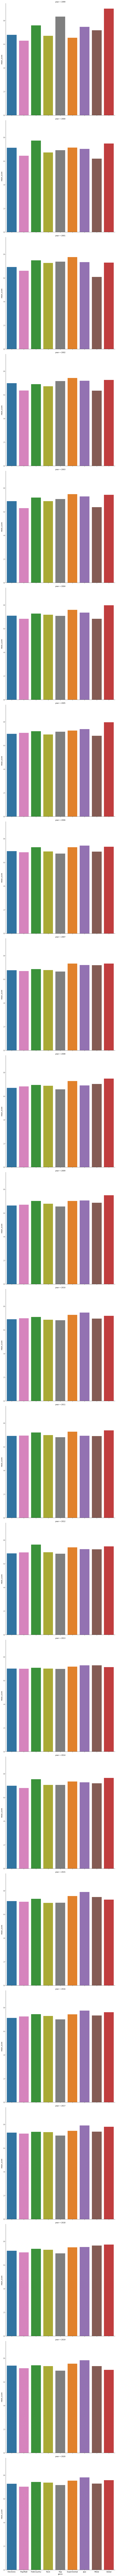

In [37]:
sns.FacetGrid(data = df, row = 'year', hue = 'genre', height = 10).map(sns.barplot, 'genre', 'mean_score', order = unique_genres)

(1.7434380992526413,
 1.0,
 168,
 array([[7.15981759, 7.51322732, 7.4577844 , 7.71226113, 7.55781746,
         7.15476806, 6.9976478 , 7.17453747, 7.17329067],
        [6.82204039, 7.15877738, 7.10595007, 7.34842141, 7.2012639 ,
         6.81722907, 6.66752125, 6.83606582, 6.83487785],
        [6.96571369, 7.30954241, 7.25560256, 7.50318038, 7.35292371,
         6.96080105, 6.80794035, 6.9800345 , 6.97882151],
        [6.77244432, 7.10673324, 7.05428999, 7.29499857, 7.14891089,
         6.76766799, 6.61904853, 6.78636779, 6.78518846],
        [6.8373728 , 7.1748666 , 7.12192057, 7.36493686, 7.21744861,
         6.83255067, 6.68250638, 6.85142976, 6.85023912],
        [7.082026  , 7.43159591, 7.37675538, 7.62846722, 7.47570158,
         7.07703133, 6.92161818, 7.09658593, 7.09535269],
        [7.03429108, 7.38150479, 7.3270339 , 7.57704913, 7.42531318,
         7.02933007, 6.87496446, 7.04875288, 7.04752795],
        [6.91701842, 7.25844354, 7.20488077, 7.45072785, 7.30152157,
         

### The cell below shows the results of one-way ANOVA test on the mean scores per genre in each year
### In most years, there is evidence of a significant difference between average scores per genre, but not in 1999, 2000, 2011, or 2013

In [294]:
def pre_anova(DF):
    return[DF.loc[DF['genre'] == genre]['score'] for genre in unique_genres]

genre_copy.groupby('review_year').apply(lambda DF: stats.f_oneway(*pre_anova(DF)))

review_year
1999      (1.0872287207127178, 0.37238085617778593)
2000      (1.2323115204577901, 0.27847444936287585)
2001     (2.7962469911880277, 0.004881341416720138)
2002     (3.527128453646127, 0.0004934852299085205)
2003     (4.201622316509159, 5.584921111620323e-05)
2004     (3.699211592913678, 0.0002775757280353926)
2005     (2.2033102044809123, 0.024853798236180953)
2006     (2.4810932338087897, 0.011331962038678431)
2007    (3.6050788199315096, 0.0003724018276175661)
2008     (2.8907263085923343, 0.003384930687819513)
2009       (1.9983985502299173, 0.0434215899320625)
2010      (2.0157194466255643, 0.04145145711820854)
2011      (1.7830677157778714, 0.07617998559286487)
2012     (3.522930980341316, 0.0004891169623554195)
2013       (0.9150905257212792, 0.5029235000367176)
2014      (2.867109445394427, 0.003712350274352038)
2015    (6.8325046144326995, 8.624335937126754e-09)
2016     (4.142514353039964, 6.693305281578216e-05)
2017    (4.969850608252921, 4.4254127104289635e-06)


In [39]:
counts = genre_copy[['review_year', 'genre', 'score']].groupby(['review_year', 'genre']).count()
for x in counts.index:
    print(x, counts.loc[x])
    print('-'*50)

(1999, 'Electronic') score    68
Name: (1999, Electronic), dtype: int64
--------------------------------------------------
(1999, 'Experimental') score    23
Name: (1999, Experimental), dtype: int64
--------------------------------------------------
(1999, 'Folk/Country') score    7
Name: (1999, Folk/Country), dtype: int64
--------------------------------------------------
(1999, 'Global') score    1
Name: (1999, Global), dtype: int64
--------------------------------------------------
(1999, 'Jazz') score    9
Name: (1999, Jazz), dtype: int64
--------------------------------------------------
(1999, 'Metal') score    9
Name: (1999, Metal), dtype: int64
--------------------------------------------------
(1999, 'Pop/R&B') score    11
Name: (1999, Pop/R&B), dtype: int64
--------------------------------------------------
(1999, 'Rap') score    3
Name: (1999, Rap), dtype: int64
--------------------------------------------------
(1999, 'Rock') score    136
Name: (1999, Rock), dtype: int64
--

Name: (2015, Global), dtype: int64
--------------------------------------------------
(2015, 'Jazz') score    16
Name: (2015, Jazz), dtype: int64
--------------------------------------------------
(2015, 'Metal') score    59
Name: (2015, Metal), dtype: int64
--------------------------------------------------
(2015, 'Pop/R&B') score    110
Name: (2015, Pop/R&B), dtype: int64
--------------------------------------------------
(2015, 'Rap') score    158
Name: (2015, Rap), dtype: int64
--------------------------------------------------
(2015, 'Rock') score    435
Name: (2015, Rock), dtype: int64
--------------------------------------------------
(2016, 'Electronic') score    246
Name: (2016, Electronic), dtype: int64
--------------------------------------------------
(2016, 'Experimental') score    131
Name: (2016, Experimental), dtype: int64
--------------------------------------------------
(2016, 'Folk/Country') score    54
Name: (2016, Folk/Country), dtype: int64
----------------------

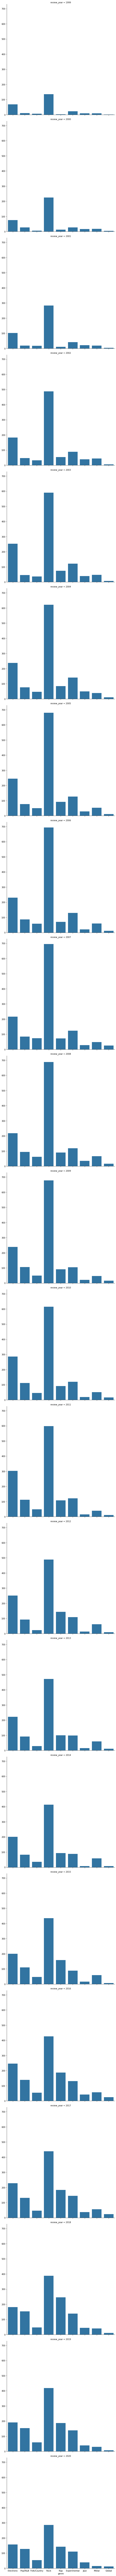

In [38]:
counts_facet = sns.FacetGrid(data = genre_copy, row = 'review_year', height = 8)
counts_facet.map(sns.countplot, 'genre', order = unique_genres)

In [40]:
genre_copy[['review_year', 'genre', 'score']].groupby(['review_year', 'genre']).count()

score
review_year genre              
1999        Electronic       68
            Experimental     23
            Folk/Country      7
            Global            1
            Jazz              9
...                         ...
2020        Jazz             38
            Metal            14
            Pop/R&B         127
            Rap             142
            Rock            286

[198 rows x 1 columns]

In [41]:
pronoun_df[['masc_pronouns', 'fem_pronouns', 'score']].corr()

,masc_pronouns,fem_pronouns,score
masc_pronouns,1.000000,-0.170471,0.092464
fem_pronouns,-0.170471,1.000000,0.091819
score,0.092464,0.091819,1.000000


In [42]:
np.sum(pitchfork.isnull()) #examine missing data

album                 10
artist                 1
best_new_music         0
best_new_reissue       0
genre               2336
label                 35
review_date            0
review_text            4
reviewer               0
score                  0
year                   0
dtype: int64

In [43]:
pitchfork[pitchfork['artist'].isnull()] #the artist's name is NA and python iterpreted this as a missing value

,album,artist,best_new_music,best_new_reissue,genre,label,review_date,review_text,reviewer,score,year
7480,Cellar EP,NaN,False,False,Electronic,Fade to Mind,2016-02-29T06:00:03,Working with a large cohort of friends and col...,Kevin Lozano,7.5,2016


,album,artist,best_new_music,best_new_reissue,genre,label,review_date,review_text,reviewer,score,year
12,&&&&&,Arca,False,True,Experimental,Pan,2020-09-21T05:00:00,"It sounds strange to say it now, but when Arca...",Emilie Friedlander,8.4,2020
16,Electr-O-Pura,Yo La Tengo,False,True,Rock,Matador,2020-09-14T05:00:00,"In the fall of 1994, Yo La Tengo spent three n...",Marc Hogan,9.1,2020
29,Totally Crushed Out!,that dog.,False,True,Rock,Third Man,2020-07-30T05:00:00,"In 1992, Los Angeles’ that dog. formed in the ...",Jenn Pelly,8.3,2020
99,No Other,Gene Clark,False,True,Folk/Country,4AD,2019-11-14T06:00:00,"For those that knew him, there seemed to be tw...",Andy Beta,9.3,2019
145,Amplified Heart,Everything But the Girl,False,True,Electronic|Pop/R&B,Chrysalis|Buzzin' Fly,2019-07-16T05:00:00,A phoenix rising from the ashes. “What doesn’t...,Philip Sherburne,8.6,2019
...,...,...,...,...,...,...,...,...,...,...,...
15011,Volume One: The Vodoun Effect (Funk & Sato fro...,Orchestre Poly-Rythmo de Cotonou,False,True,NaN,Analog Africa,2009-02-06T06:00:03,Recording more than 50 albums and hundreds of ...,Joe Tangari,8.7,2008
15031,Paul’s Boutique,Beastie Boys,False,True,Rap|Rock,Capitol,2009-02-13T06:00:00,It’s easy to forget exactly how painted into a...,Nate Patrin,10.0,1989/2009
15103,"Francophonic, Vol. 1: 1953 - 1980",Franco & le Tout Puissant OK Jazz,False,True,NaN,Sterns Africa,2009-03-08T06:00:02,"This is the story of François Luambo Makiadi, ...",Mike Powell,8.8,2008
15161,Histoire de Melody Nelson,Serge Gainsbourg,False,True,Pop/R&B,Light in the Attic,2009-03-26T06:00:02,Serge Gainsbourg had no great attachment to ge...,Tom Ewing,10.0,1971/2009


### analysis of contents of reviews

In [44]:
import nltk

In [45]:
from nltk.corpus import stopwords

In [115]:
pitch_nlp = pitchfork.copy()
pitch_nlp = pitch_nlp[~pitch_nlp['review_text'].isna()]

In [116]:
pitch_nlp = pitch_nlp[~pitch_nlp['review_text'].isna()]
pitch_nlp['review_text'] = pitch_nlp['review_text'].str.lower()

In [117]:
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [118]:
pitch_nlp['review_text'] = pitch_nlp['review_text'].apply(lambda text: " ".join(word for word in text.split() if word not in stop))
pitch_nlp['review_text'] = pitch_nlp['review_text'].apply(lambda x: re.sub('[^\w\s]', '', x))

In [51]:
pitch_nlp[pitch_nlp['review_text'].apply(lambda s: isinstance(s, float))]

,album,artist,best_new_music,best_new_reissue,genre,label,review_date,review_text,reviewer,score,year


In [122]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=2000, width=800, height=400)
# generate word cloud
wc.generate(' '.join(pitch_nlp['review_text']))

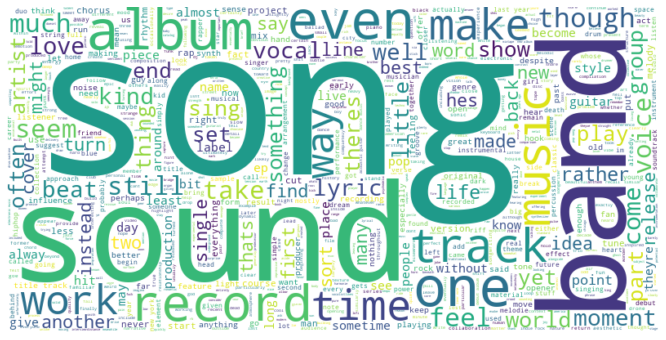

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

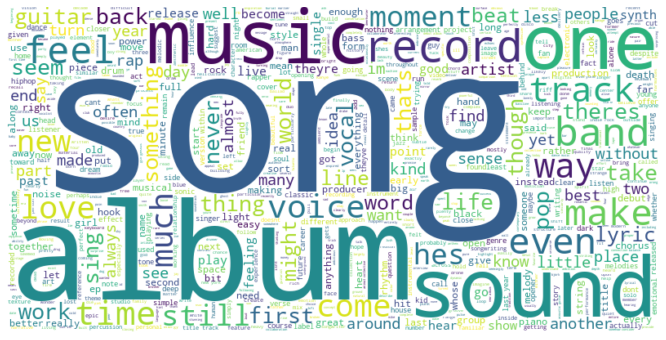

In [125]:
best_new = pitch_nlp[pitch_nlp['best_new_music'] == True]

wc_best = WordCloud(background_color="white", max_words=2000, width=800, height=400)

wc_best.generate(' '.join(best_new['review_text']))

plt.figure(figsize=(12, 6))
plt.imshow(wc_best, interpolation='bilinear')
plt.axis("off")
plt.show()

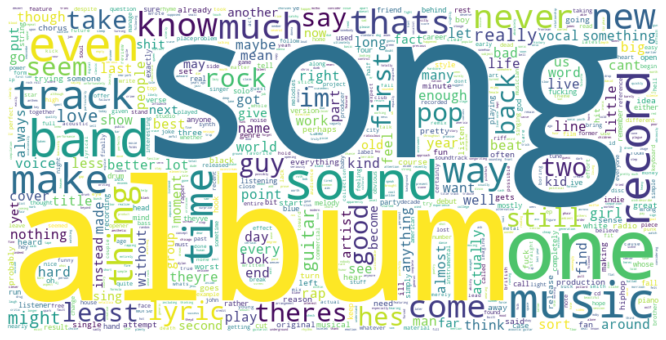

In [126]:
worst_reviewed = pitch_nlp[pitch_nlp['score'] < 3]

wc_worst = WordCloud(background_color="white", max_words=2000, width=800, height=400)

wc_worst.generate(' '.join(worst_reviewed['review_text']))

plt.figure(figsize=(12, 6))
plt.imshow(wc_worst, interpolation='bilinear')
plt.axis("off")
plt.show()

In [56]:
from textblob import TextBlob

In [57]:
def sentiment_func(x):
    sentiment = TextBlob(x['review_text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

In [58]:
review_sentiment = pitch_nlp.apply(sentiment_func, axis=1)

                 score  subjectivity
score         1.000000     -0.042633
subjectivity -0.042633      1.000000


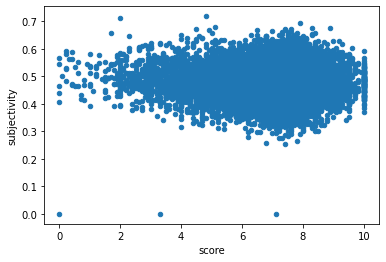

In [69]:
review_sentiment.plot.scatter('score', 'subjectivity')
print(review_sentiment[['score', 'subjectivity']].corr())

             score  polarity
score     1.000000  0.135868
polarity  0.135868  1.000000


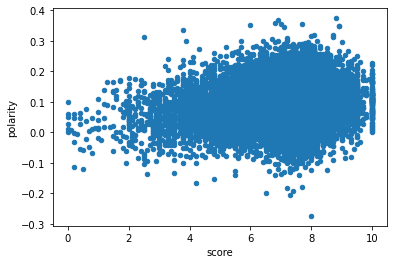

In [70]:
review_sentiment.plot.scatter('score', 'polarity')
print(review_sentiment[['score', 'polarity']].corr())

,album,artist,best_new_music,best_new_reissue,genre,label,review_date,review_text,reviewer,score,year,polarity,subjectivity
0,Apple,A. G. Cook,False,False,Electronic,PC Music,2020-09-24T05:00:00,pc music founder g cook settled apple album ti...,Claire Lobenfeld,7.5,2020,0.144153,0.464756
1,A Day in a Yellow Beat,Yellow Days,False,False,Pop/R&B,RCA|Sony,2020-09-22T05:00:00,since age 17 george van den broek performed go...,Ashley Bardhan,5.9,2020,0.166769,0.457625
2,BREACH,Fenne Lily,False,False,Folk/Country|Rock,Dead Oceans,2020-09-22T05:00:00,comes time disenchanted young mans life unbear...,Cat Zhang,6.7,2020,0.009776,0.508353
3,BC,Bwoy Coyote,False,False,Pop/R&B,self-released,2020-09-22T05:00:00,much information readily available bwoy coyote...,Hubert Adjei-Kontoh,7.1,2020,0.037798,0.391327
4,Host,Cults,False,False,Rock,Sinderlyn,2020-09-22T05:00:00,indiepop world completed several rotations aro...,Arielle Gordon,6.8,2020,0.006494,0.385562
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22891,Tango n' Vectif,µ-Ziq,False,False,Electronic,Rephlex,2001-11-08T06:00:00,1993 idm phenomenon drawn enough recognition m...,Malcolm Seymour III,9.4,1993/2001,0.148743,0.459454
22892,Get There,Matt Marque,False,False,NaN,Truckstop,2001-11-08T06:00:01,well frustrating one one hand matt marques deb...,Joe Tangari,5.7,2001,0.155379,0.527229
22893,Zeroone,Mia Doi Todd,False,False,Folk/Country,City Zen,2001-11-11T06:00:00,landing handful critics yearend top ten lists ...,Jason Nickey,7.1,2001,0.093579,0.478194
22894,Been Here and Gone,Thalia Zedek,False,False,Rock,Matador,2001-11-08T06:00:02,record new york new york pj harvey wailed stor...,Andi Rowlands,8.5,2001,0.076807,0.445221


In [71]:
genreview = pitchfork[['genre', 'score', 'review_text']].copy().dropna()

In [72]:
genres = genreview['genre'].map(lambda s: s.split('|'))
genres_split = []
for index in genres.index:
    genres_split.extend([[index, genre] for genre in genres[index]])
to_join = pd.DataFrame(genres_split, columns = ['index', 'genre'])
genreview = pd.merge(genreview.drop('genre', axis = 1), to_join, left_index=True, right_on='index')
genreview

,score,review_text,index,genre
0,7.5,PC Music founder A. G. Cook settled on Apple a...,0,Electronic
1,5.9,"Since age 17, George van den Broek has perform...",1,Pop/R&B
2,6.7,There comes a time in a disenchanted young man...,2,Folk/Country
3,6.7,There comes a time in a disenchanted young man...,2,Rock
4,7.1,Not much information is readily available on B...,3,Pop/R&B
...,...,...,...,...
24629,7.5,"The second release for Substractif, the headph...",22890,Electronic
24630,9.4,"In 1993, before the IDM phenomenon had drawn e...",22891,Electronic
24631,7.1,After landing on a handful of critics' year-en...,22893,Folk/Country
24632,8.5,This record is New York. Not the same New York...,22894,Rock


In [138]:
genreview = genreview.dropna()
genreview['review_text']= genreview['review_text'].str.lower()
genreview['review_text'] = genreview['review_text'].apply(lambda text: " ".join([word for word in text.split() if word not in stop]))
genreview['review_text'] = genreview['review_text'].apply(lambda x: re.sub('[^\w\s]', '', x))
genreview

,score,review_text,index,genre
0,7.5,pc music founder g cook settled apple album ti...,0,Electronic
1,5.9,since age 17 george van den broek performed go...,1,Pop/R&B
2,6.7,comes time disenchanted young mans life unbear...,2,Folk/Country
3,6.7,comes time disenchanted young mans life unbear...,2,Rock
4,7.1,much information readily available bwoy coyote...,3,Pop/R&B
...,...,...,...,...
24629,7.5,second release substractif headphonedeeplisten...,22890,Electronic
24630,9.4,1993 idm phenomenon drawn enough recognition m...,22891,Electronic
24631,7.1,landing handful critics yearend top ten lists ...,22893,Folk/Country
24632,8.5,record new york new york pj harvey wailed stor...,22894,Rock


In [74]:
review_sentiment_by_genre = genreview.apply(sentiment_func, axis=1)
review_sentiment_by_genre

,score,review_text,index,genre,polarity,subjectivity
0,7.5,pc music founder g cook settled apple album ti...,0,Electronic,0.144153,0.464756
1,5.9,since age 17 george van den broek performed go...,1,Pop/R&B,0.166769,0.457625
2,6.7,comes time disenchanted young mans life unbear...,2,Folk/Country,0.009776,0.508353
3,6.7,comes time disenchanted young mans life unbear...,2,Rock,0.009776,0.508353
4,7.1,much information readily available bwoy coyote...,3,Pop/R&B,0.037798,0.391327
...,...,...,...,...,...,...
24629,7.5,second release substractif headphonedeeplisten...,22890,Electronic,0.130903,0.476852
24630,9.4,1993 idm phenomenon drawn enough recognition m...,22891,Electronic,0.148743,0.459454
24631,7.1,landing handful critics yearend top ten lists ...,22893,Folk/Country,0.093579,0.478194
24632,8.5,record new york new york pj harvey wailed stor...,22894,Rock,0.076807,0.445221


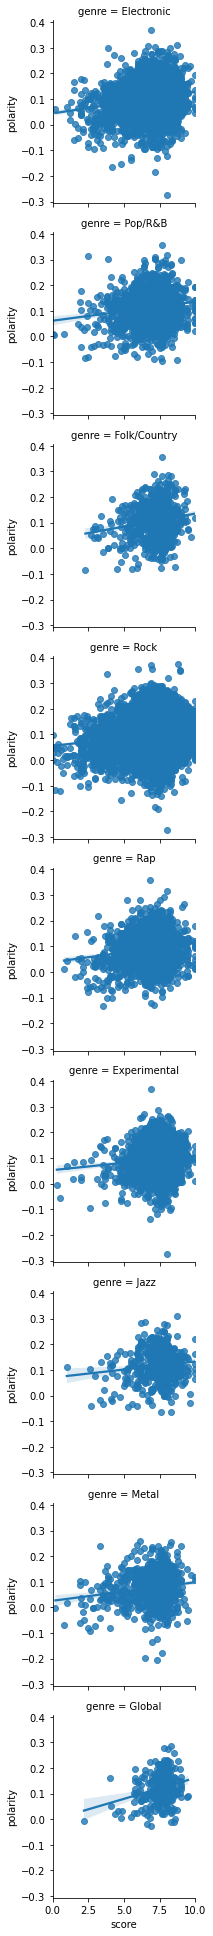

In [65]:
sns.FacetGrid(data = review_sentiment_by_genre, row = 'genre').map(sns.regplot, 'score', 'polarity')

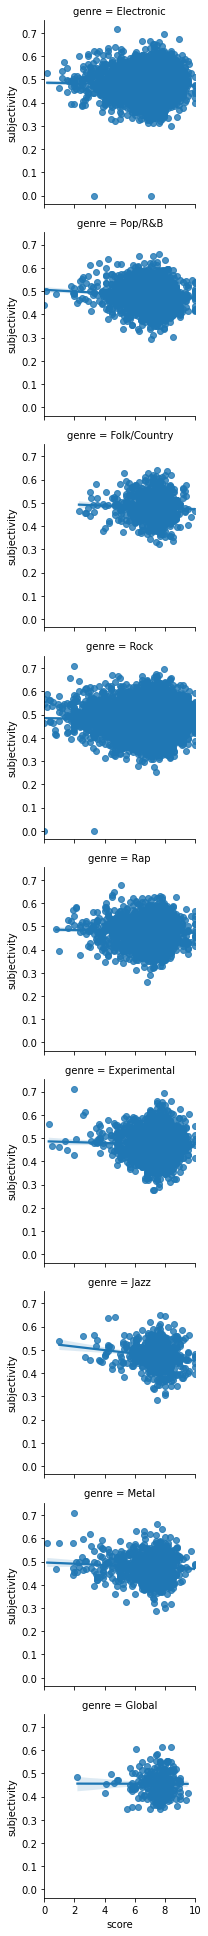

In [75]:
sns.FacetGrid(data = review_sentiment_by_genre, row = 'genre').map(sns.regplot, 'score', 'subjectivity')

In [76]:
stats.f_oneway(*[review_sentiment_by_genre[review_sentiment_by_genre['genre'] == genre]['subjectivity'] for genre in unique_genres])

F_onewayResult(statistic=11.380285991293807, pvalue=3.0738683805629567e-16)

,album,artist,best_new_music,best_new_reissue,genre,label,review_date,review_text,reviewer,score,year,masc_pronouns,fem_pronouns
0,Apple,A. G. Cook,False,False,Electronic,PC Music,2020-09-24T05:00:00,PC Music founder A. G. Cook settled on Apple a...,Claire Lobenfeld,7.5,2020,5,0
1,A Day in a Yellow Beat,Yellow Days,False,False,Pop/R&B,RCA|Sony,2020-09-22T05:00:00,"Since age 17, George van den Broek has perform...",Ashley Bardhan,5.9,2020,10,1
2,BREACH,Fenne Lily,False,False,Folk/Country|Rock,Dead Oceans,2020-09-22T05:00:00,There comes a time in a disenchanted young man...,Cat Zhang,6.7,2020,4,3
3,BC,Bwoy Coyote,False,False,Pop/R&B,self-released,2020-09-22T05:00:00,Not much information is readily available on B...,Hubert Adjei-Kontoh,7.1,2020,30,0
4,Host,Cults,False,False,Rock,Sinderlyn,2020-09-22T05:00:00,The indie-pop world has completed several rota...,Arielle Gordon,6.8,2020,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22891,Tango n' Vectif,µ-Ziq,False,False,Electronic,Rephlex,2001-11-08T06:00:00,"In 1993, before the IDM phenomenon had drawn e...",Malcolm Seymour III,9.4,1993/2001,13,0
22892,Get There,Matt Marque,False,False,NaN,Truckstop,2001-11-08T06:00:01,"Well, this is a frustrating one. On the one ha...",Joe Tangari,5.7,2001,20,0
22893,Zeroone,Mia Doi Todd,False,False,Folk/Country,City Zen,2001-11-11T06:00:00,After landing on a handful of critics' year-en...,Jason Nickey,7.1,2001,0,21
22894,Been Here and Gone,Thalia Zedek,False,False,Rock,Matador,2001-11-08T06:00:02,This record is New York. Not the same New York...,Andi Rowlands,8.5,2001,1,5


In [77]:
genreview

,score,review_text,index,genre
0,7.5,pc music founder g cook settled apple album ti...,0,Electronic
1,5.9,since age 17 george van den broek performed go...,1,Pop/R&B
2,6.7,comes time disenchanted young mans life unbear...,2,Folk/Country
3,6.7,comes time disenchanted young mans life unbear...,2,Rock
4,7.1,much information readily available bwoy coyote...,3,Pop/R&B
...,...,...,...,...
24629,7.5,second release substractif headphonedeeplisten...,22890,Electronic
24630,9.4,1993 idm phenomenon drawn enough recognition m...,22891,Electronic
24631,7.1,landing handful critics yearend top ten lists ...,22893,Folk/Country
24632,8.5,record new york new york pj harvey wailed stor...,22894,Rock


In [83]:
genreview[['genre', 'review_text']].groupby('genre')['review_text']

In [84]:
pd.Series(genreview[['genre', 'review_text']].groupby('genre')['review_text'])

0    (Electronic, [pc music founder g cook settled ...
1    (Experimental, [finding oneself never easy ang...
2    (Folk/Country, [comes time disenchanted young ...
3    (Global, [first thing heard slikback year ago ...
4    (Jazz, [takuya kuroda hails kobe japan nation ...
5    (Metal, [code orange brink breakthrough since ...
6    (Pop/R&B, [since age 17 george van den broek p...
7    (Rap, [following long hot streak cemented labe...
8    (Rock, [comes time disenchanted young mans lif...
dtype: object

In [102]:
long_review_string = ' '.join(genreview[genreview['genre'] == 'Global']['review_text'].dropna().tolist()).split()

In [111]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
import collections
for genre in unique_genres:
    long_review_string = ' '.join(genreview[genreview['genre'] == genre]['review_text'].dropna().tolist())
    stemmed_text = [stemmer.stem(word) for word in long_review_string.split()]
    counter = collections.Counter(stemmed_text)
    print(genre, counter.most_common()[0:10], '\n', '-'*50)

Electronic [('like', 16958), ('music', 13212), ('sound', 12438), ('album', 12389), ('track', 10554), ('song', 8793), ('record', 8502), ('one', 8431), ('make', 6352), ('work', 5533)] 
 --------------------------------------------------
Pop/R&B [('like', 7961), ('song', 6832), ('album', 6551), ('music', 4719), ('sound', 4465), ('one', 4103), ('record', 3664), ('track', 3453), ('pop', 3090), ('make', 2999)] 
 --------------------------------------------------
Folk/Country [('song', 3893), ('like', 3286), ('album', 3019), ('record', 2153), ('music', 2089), ('sound', 1961), ('one', 1748), ('guitar', 1498), ('make', 1223), ('even', 1195)] 
 --------------------------------------------------
Rock [('like', 41046), ('song', 37431), ('album', 33710), ('band', 32021), ('sound', 25755), ('record', 24250), ('one', 21970), ('music', 20932), ('track', 16088), ('guitar', 16045)] 
 --------------------------------------------------
Rap [('like', 10242), ('rap', 7119), ('album', 7109), ('song', 5245), 

In [141]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
high_score_words = {}
for genre in unique_genres:
    long_review_string = ' '.join(genreview[(genreview['genre'] == genre) & (genreview['score'] > 8)]['review_text'].dropna().tolist())
    stemmed_text = [stemmer.stem(word) for word in long_review_string.split()]
    counter = collections.Counter(stemmed_text)
    high_score_words[genre] = counter.most_common()[:10]
    print(genre, counter.most_common()[0:10], '\n', '-'*50)

Electronic [('like', 2956), ('music', 2781), ('sound', 2304), ('album', 2271), ('record', 1767), ('track', 1766), ('one', 1607), ('song', 1477), ('make', 1097), ('time', 1085)] 
 --------------------------------------------------
Pop/R&B [('like', 1395), ('song', 1337), ('album', 1304), ('music', 1084), ('one', 917), ('record', 793), ('sound', 752), ('love', 639), ('time', 626), ('make', 561)] 
 --------------------------------------------------
Folk/Country [('song', 719), ('like', 586), ('album', 496), ('music', 456), ('record', 440), ('one', 376), ('sound', 316), ('time', 277), ('guitar', 265), ('make', 256)] 
 --------------------------------------------------
Rock [('like', 8358), ('song', 8251), ('album', 7463), ('band', 7443), ('record', 6082), ('sound', 5395), ('music', 5384), ('one', 5277), ('time', 3595), ('guitar', 3314)] 
 --------------------------------------------------
Rap [('like', 1596), ('album', 1414), ('rap', 1238), ('one', 960), ('song', 841), ('sound', 707), ('re

In [143]:
stemmer = PorterStemmer()
low_score_words = {}
for genre in unique_genres:
    long_review_string = ' '.join(genreview[(genreview['genre'] == genre) & (genreview['score'] < 5)]['review_text'].dropna().tolist())
    stemmed_text = [stemmer.stem(word) for word in long_review_string.split()]
    counter = collections.Counter(stemmed_text)
    low_score_words[genre] = counter.most_common()[:10]
    print(genre, counter.most_common()[0:10], '\n', '-'*50)

Electronic [('like', 1038), ('album', 717), ('song', 696), ('music', 644), ('sound', 571), ('track', 548), ('one', 546), ('record', 453), ('band', 434), ('even', 399)] 
 --------------------------------------------------
Pop/R&B [('like', 557), ('album', 440), ('song', 424), ('one', 311), ('music', 277), ('sound', 254), ('track', 218), ('pop', 212), ('even', 209), ('record', 209)] 
 --------------------------------------------------
Folk/Country [('song', 153), ('like', 145), ('album', 112), ('music', 83), ('one', 75), ('sound', 73), ('record', 69), ('even', 51), ('time', 48), ('make', 45)] 
 --------------------------------------------------
Rock [('like', 2961), ('song', 2356), ('album', 2118), ('band', 2024), ('sound', 1657), ('one', 1480), ('record', 1435), ('music', 1326), ('even', 1245), ('make', 1073)] 
 --------------------------------------------------
Rap [('like', 768), ('album', 547), ('rap', 460), ('song', 399), ('one', 343), ('he', 317), ('even', 315), ('make', 302), ('so

In [140]:
low_score_words_df = pd.DataFrame(low_score_words)
low_score_words_df

,Electronic,Pop/R&B,Folk/Country,Rock,Rap,Experimental,Jazz,Metal,Global
0,"(like, 512)","(like, 205)","(song, 76)","(like, 1356)","(like, 314)","(like, 87)","(like, 29)","(like, 195)","(yoav, 10)"
1,"(song, 329)","(album, 153)","(like, 63)","(song, 1070)","(album, 220)","(music, 71)","(music, 29)","(album, 125)","(one, 6)"
2,"(album, 310)","(song, 133)","(album, 52)","(album, 915)","(rap, 201)","(album, 68)","(album, 23)","(band, 114)","(charm, 5)"
3,"(music, 290)","(one, 105)","(music, 48)","(band, 870)","(song, 149)","(song, 60)","(even, 20)","(song, 110)","(strang, 5)"
4,"(one, 274)","(music, 89)","(kozelek, 44)","(sound, 726)","(he, 133)","(one, 52)","(record, 19)","(record, 99)","(like, 4)"
5,"(track, 248)","(get, 86)","(sound, 37)","(one, 693)","(sound, 130)","(band, 49)","(track, 19)","(one, 96)","(ador, 4)"
6,"(sound, 240)","(even, 83)","(one, 33)","(record, 647)","(make, 124)","(sound, 49)","(band, 19)","(sound, 82)","(day, 3)"
7,"(band, 226)","(sound, 75)","(record, 29)","(even, 624)","(even, 123)","(record, 47)","(one, 16)","(music, 78)","(band, 3)"
8,"(even, 219)","(track, 72)","(drake, 26)","(music, 623)","(one, 123)","(even, 45)","(might, 16)","(even, 67)","(guitar, 3)"
9,"(record, 209)","(pop, 70)","(time, 24)","(make, 489)","(get, 118)","(track, 41)","(sound, 13)","(track, 61)","(say, 3)"


In [142]:
high_score_words_df = pd.DataFrame(high_score_words)
high_score_words_df

,Electronic,Pop/R&B,Folk/Country,Rock,Rap,Experimental,Jazz,Metal,Global
0,"(like, 2956)","(like, 1395)","(song, 719)","(like, 8358)","(like, 1596)","(music, 2078)","(music, 685)","(band, 717)","(music, 344)"
1,"(music, 2781)","(song, 1337)","(like, 586)","(song, 8251)","(album, 1414)","(like, 2043)","(like, 571)","(like, 666)","(album, 252)"
2,"(sound, 2304)","(album, 1304)","(album, 496)","(album, 7463)","(rap, 1238)","(sound, 1656)","(record, 538)","(metal, 558)","(like, 239)"
3,"(album, 2271)","(music, 1084)","(music, 456)","(band, 7443)","(one, 960)","(album, 1482)","(jazz, 524)","(album, 552)","(sound, 199)"
4,"(record, 1767)","(one, 917)","(record, 440)","(record, 6082)","(song, 841)","(record, 1381)","(album, 491)","(song, 426)","(song, 194)"
5,"(track, 1766)","(record, 793)","(one, 376)","(sound, 5395)","(sound, 707)","(song, 1265)","(one, 475)","(record, 410)","(record, 186)"
6,"(one, 1607)","(sound, 752)","(sound, 316)","(music, 5384)","(record, 685)","(one, 1225)","(sound, 411)","(one, 408)","(one, 183)"
7,"(song, 1477)","(love, 639)","(time, 277)","(one, 5277)","(music, 668)","(band, 991)","(play, 376)","(sound, 366)","(time, 130)"
8,"(make, 1097)","(time, 626)","(guitar, 265)","(time, 3595)","(make, 635)","(track, 874)","(new, 329)","(music, 354)","(track, 121)"
9,"(time, 1085)","(make, 561)","(make, 256)","(guitar, 3314)","(track, 615)","(time, 839)","(band, 304)","(black, 315)","(year, 112)"


In [154]:
stemmer = PorterStemmer()
perfect_score_words = {}
for genre in unique_genres[:-1]:
    long_review_string = ' '.join(genreview[(genreview['genre'] == genre) & (genreview['score'] == 10)]['review_text'].dropna().tolist())
    stemmed_text = [stemmer.stem(word) for word in long_review_string.split()]
    counter = collections.Counter(stemmed_text)
    perfect_score_words[genre] = counter.most_common()[:10]
    print(genre, counter.most_common()[0:10], '\n', '-'*50)

Electronic [('album', 87), ('like', 81), ('music', 78), ('björk', 77), ('record', 42), ('one', 41), ('eno', 41), ('sound', 32), ('year', 28), ('song', 28)] 
 --------------------------------------------------
Pop/R&B [('album', 153), ('song', 137), ('music', 128), ('princ', 125), ('like', 123), ('one', 98), ('record', 98), ('björk', 77), ('year', 67), ('time', 66)] 
 --------------------------------------------------
Folk/Country [('music', 5), ('oldham', 5), ('record', 4), ('dark', 4), ('new', 3), ('see', 3), ('familiar', 3), ('feel', 3), ('seem', 2), ('background', 2)] 
 --------------------------------------------------
Rock [('album', 583), ('song', 550), ('band', 469), ('record', 467), ('like', 464), ('one', 343), ('music', 305), ('sound', 283), ('time', 227), ('even', 223)] 
 --------------------------------------------------
Rap [('album', 108), ('like', 106), ('rap', 89), ('one', 80), ('new', 66), ('record', 63), ('dre', 56), ('song', 55), ('sound', 51), ('hiphop', 50)] 
 -----

In [155]:
perfect_score_words_df = pd.DataFrame(perfect_score_words)
perfect_score_words_df

,Electronic,Pop/R&B,Folk/Country,Rock,Rap,Experimental,Jazz,Metal
0,"(album, 87)","(album, 153)","(music, 5)","(album, 583)","(album, 108)","(music, 43)","(coltran, 74)","(metal, 24)"
1,"(like, 81)","(song, 137)","(oldham, 5)","(song, 550)","(like, 106)","(like, 43)","(music, 58)","(metallica, 24)"
2,"(music, 78)","(music, 128)","(record, 4)","(band, 469)","(rap, 89)","(one, 42)","(record, 51)","(band, 21)"
3,"(björk, 77)","(princ, 125)","(dark, 4)","(record, 467)","(one, 80)","(band, 35)","(gould, 44)","(live, 17)"
4,"(record, 42)","(like, 123)","(new, 3)","(like, 464)","(new, 66)","(record, 32)","(like, 39)","(hetfield, 15)"
5,"(one, 41)","(one, 98)","(see, 3)","(one, 343)","(record, 63)","(sound, 30)","(jazz, 32)","(puppet, 13)"
6,"(eno, 41)","(record, 98)","(familiar, 3)","(music, 305)","(dre, 56)","(album, 27)","(love, 30)","(album, 13)"
7,"(sound, 32)","(björk, 77)","(feel, 3)","(sound, 283)","(song, 55)","(song, 25)","(time, 27)","(music, 13)"
8,"(year, 28)","(year, 67)","(seem, 2)","(time, 227)","(sound, 51)","(guitar, 22)","(play, 25)","(like, 13)"
9,"(song, 28)","(time, 66)","(background, 2)","(even, 223)","(hiphop, 50)","(piec, 21)","(suprem, 23)","(even, 12)"


In [156]:
pip install gender-guesser

     |████████████████████████████████| 379 kB 732 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [185]:
import gender_guesser.detector as gender
d = gender.Detector()
print(d.get_gender("Anne"))

female


In [188]:
pitchfork['reviewer'].apply(lambda s: d.get_gender(s.split()[0])).value_counts()

male             17664
female            2287
mostly_male       1534
unknown            675
andy               397
mostly_female      339
Name: reviewer, dtype: int64

In [202]:
reviewer_gender_df = pitchfork[['reviewer', 'score', 'review_text']].copy()
reviewer_gender_df

,reviewer,score,review_text
0,Claire Lobenfeld,7.5,PC Music founder A. G. Cook settled on Apple a...
1,Ashley Bardhan,5.9,"Since age 17, George van den Broek has perform..."
2,Cat Zhang,6.7,There comes a time in a disenchanted young man...
3,Hubert Adjei-Kontoh,7.1,Not much information is readily available on B...
4,Arielle Gordon,6.8,The indie-pop world has completed several rota...
...,...,...,...
22891,Malcolm Seymour III,9.4,"In 1993, before the IDM phenomenon had drawn e..."
22892,Joe Tangari,5.7,"Well, this is a frustrating one. On the one ha..."
22893,Jason Nickey,7.1,After landing on a handful of critics' year-en...
22894,Andi Rowlands,8.5,This record is New York. Not the same New York...


In [203]:
reviewer_gender_df['reviewer_gender'] = reviewer_gender_df['reviewer'].apply(lambda s: d.get_gender(s.split()[0]))
reviewer_gender_df['reviewer_gender']

0               female
1        mostly_female
2          mostly_male
3                 male
4               female
             ...      
22891             male
22892             male
22893             male
22894             male
22895             male
Name: reviewer_gender, Length: 22896, dtype: object

In [207]:
reviewer_gender_df = reviewer_gender_df[~reviewer_gender_df['review_text'].isnull()]
reviewer_gender_df

,reviewer,score,review_text,reviewer_gender
0,Claire Lobenfeld,7.5,PC Music founder A. G. Cook settled on Apple a...,female
1,Ashley Bardhan,5.9,"Since age 17, George van den Broek has perform...",mostly_female
2,Cat Zhang,6.7,There comes a time in a disenchanted young man...,mostly_male
3,Hubert Adjei-Kontoh,7.1,Not much information is readily available on B...,male
4,Arielle Gordon,6.8,The indie-pop world has completed several rota...,female
...,...,...,...,...
22891,Malcolm Seymour III,9.4,"In 1993, before the IDM phenomenon had drawn e...",male
22892,Joe Tangari,5.7,"Well, this is a frustrating one. On the one ha...",male
22893,Jason Nickey,7.1,After landing on a handful of critics' year-en...,male
22894,Andi Rowlands,8.5,This record is New York. Not the same New York...,male


In [209]:
reviewer_gender_df['gender_counts'] = reviewer_gender_df['review_text'].dropna().copy().apply(lambda text: (len(re.findall(masc_pron, text)), len(re.findall(fem_pron, text))))

In [211]:
reviewer_gender_df['masc_pronouns'] = reviewer_gender_df['gender_counts'].apply(lambda x: x[0])
reviewer_gender_df['fem_pronouns'] = reviewer_gender_df['gender_counts'].apply(lambda x: x[1])
reviewer_gender_df

,reviewer,score,review_text,reviewer_gender,gender_counts,masc_pronouns,fem_pronouns
0,Claire Lobenfeld,7.5,PC Music founder A. G. Cook settled on Apple a...,female,"(5, 0)",5,0
1,Ashley Bardhan,5.9,"Since age 17, George van den Broek has perform...",mostly_female,"(10, 1)",10,1
2,Cat Zhang,6.7,There comes a time in a disenchanted young man...,mostly_male,"(4, 3)",4,3
3,Hubert Adjei-Kontoh,7.1,Not much information is readily available on B...,male,"(30, 0)",30,0
4,Arielle Gordon,6.8,The indie-pop world has completed several rota...,female,"(0, 5)",0,5
...,...,...,...,...,...,...,...
22891,Malcolm Seymour III,9.4,"In 1993, before the IDM phenomenon had drawn e...",male,"(13, 0)",13,0
22892,Joe Tangari,5.7,"Well, this is a frustrating one. On the one ha...",male,"(20, 0)",20,0
22893,Jason Nickey,7.1,After landing on a handful of critics' year-en...,male,"(0, 21)",0,21
22894,Andi Rowlands,8.5,This record is New York. Not the same New York...,male,"(1, 5)",1,5


In [213]:
reviewer_gender_df = reviewer_gender_df.drop('gender_counts', axis = 1)
reviewer_gender_df

,reviewer,score,review_text,reviewer_gender,masc_pronouns,fem_pronouns
0,Claire Lobenfeld,7.5,PC Music founder A. G. Cook settled on Apple a...,female,5,0
1,Ashley Bardhan,5.9,"Since age 17, George van den Broek has perform...",mostly_female,10,1
2,Cat Zhang,6.7,There comes a time in a disenchanted young man...,mostly_male,4,3
3,Hubert Adjei-Kontoh,7.1,Not much information is readily available on B...,male,30,0
4,Arielle Gordon,6.8,The indie-pop world has completed several rota...,female,0,5
...,...,...,...,...,...,...
22891,Malcolm Seymour III,9.4,"In 1993, before the IDM phenomenon had drawn e...",male,13,0
22892,Joe Tangari,5.7,"Well, this is a frustrating one. On the one ha...",male,20,0
22893,Jason Nickey,7.1,After landing on a handful of critics' year-en...,male,0,21
22894,Andi Rowlands,8.5,This record is New York. Not the same New York...,male,1,5


In [214]:
reviewer_gender_df.groupby('reviewer_gender')['score'].mean()

reviewer_gender
andy             7.305290
female           7.092560
male             7.037793
mostly_female    7.288496
mostly_male      7.129726
unknown          7.182815
Name: score, dtype: float64

In [221]:
reviewer_gender_df[reviewer_gender_df['reviewer_gender'] == 'unknown']['reviewer'].unique()

array(['Rawiya Kameir', 'Mehan Jayasuriya', 'Ann-Derrick Gaillot',
       'Adlan Jackson', 'Nazuk Kochhar', 'NM Mashurov', 'Corban Goble',
       'Vrinda Jagota', 'Anupa Mistry', 'Shaad D’Souza', 'Jazz Monroe',
       'Lakin Starling', 'Veracia Ankrah', 'Avidan Grossman',
       'Isabelia Herrera', 'Jemima Skala', 'Mankaprr Conteh',
       'Bhanuj Kappal', 'Jenzia Burgos', 'Ivie Ani', 'Nyshka Chandran',
       'Khalia Russell', 'Shuja Haider', 'E. Tammy Kim', 'Judnick Mayard',
       'Torry Threadcraft', 'Torii MacAdams', 'kris ex', 'Karas Lamb',
       'Rahawa Haile', 'Maya-Roisin Slater', 'Mychal Denzel Smith',
       'Braudie Blais-Billie', 'Timmhotep Aku', 'Natelegé Whaley',
       'Saby Reyes-Kulkarni', 'Savy Reyes-Kulkarni',
       'Saby Reyes Kulkarni', "Da'Shan Smith", 'Edwn "STATS" Houghton',
       'H. Drew Blackburn', 'T. Cole Rachel', 'J. Edward Keyes',
       'Vish Khanna', 'Safy-Hallan Farah', 'B. David Zarley',
       'Mosi Reeves', 'Puja Patel', 'Carvell Wallace', 'Suku

In [228]:
def pron_corr(group):
    return group[['score', 'masc_pronouns']].corr().iloc[0,1], group[['score', 'fem_pronouns']].corr().iloc[0,1]

In [229]:
reviewer_gender_df.groupby('reviewer_gender').apply(pron_corr)

reviewer_gender
andy              (0.10296235704496703, 0.03857069650795327)
female            (0.05007894875765355, 0.19469128652092224)
male              (0.09626527591850832, 0.05884690197972381)
mostly_female      (0.0853184499449393, 0.12777750696500317)
mostly_male         (0.1404421084368588, 0.1290682094324385)
unknown          (-0.01299721199337405, 0.17618519537900862)
dtype: object